#Tarea 3:

Tarea obligatoria para entregarla individualmente pero se recomienda realizarla en grupos (de a 2 o 3 compañera/os), entreguen todos los integrantes consignando cuales fueron los compañerxs.

En esta tarea analizarán los audios grabados en la Tarea 2 utilizando Análisis de tiempo-frecuencia.

Para cada audio generado en la tarea 2 (item 1 realizado en Tarea 2 )

1) Llevar a memoria en Colab, extraer el VECTOR de muestras de la señal, la frecuencia de muestreo (Fr), la cantidad de muestras (M), la duración de la señal (en segundos) y graficar la señal en función del tiempo discretizado.

2) Graficar el espectrograma de la señal de audio (en función del tiempo y frecuencia en Hertz) utilizando una ventana Hamming de longitud 10001, DFT punto N=Fr cantidad de muestras en 1s y un solapado del 10%. Analice los resultados. Puede decir que la señal es estacionaria? Justifique. 

3) Realice un análisis análogo al item anterior pero con mejor resolución en frecuencia. Justifique y comente diferencias encontradas.

4) Que longitud tienen las ventanas utilizadas en los items 2 y 3? pasadas a segundos?


Recordatorio: para que se puedan correr las tareas es necesario que suban los audios utilizados, además del código que escribieron.

### **Librerías necesarias para realizar la tarea**

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from scipy.fftpack import fft,fftshift,ifft,fftfreq #funciones para trabajar con Transformada de Fourier
from scipy.io.wavfile import read, write  #para leer o grabar archivos de audio con formato wav
from scipy import signal #para convolución lineal y para ventanas

### **Para los 4 audios grabados se abordan todos los puntos pedidos:**

1) Llevar a memoria en Colab, extraer el VECTOR de muestras de la señal, la frecuencia de muestreo (Fr), la cantidad de muestras (M), la duración de la señal (en segundos) y graficar la señal en función del tiempo discretizado.

La frecuencia de muestreo del sonido "1generador" es 44100 Hz
La cantidad de muestras del audio "1generador" es de 522930
El tiempo total del audio "1generador" es de 11.8578231292517 segundos



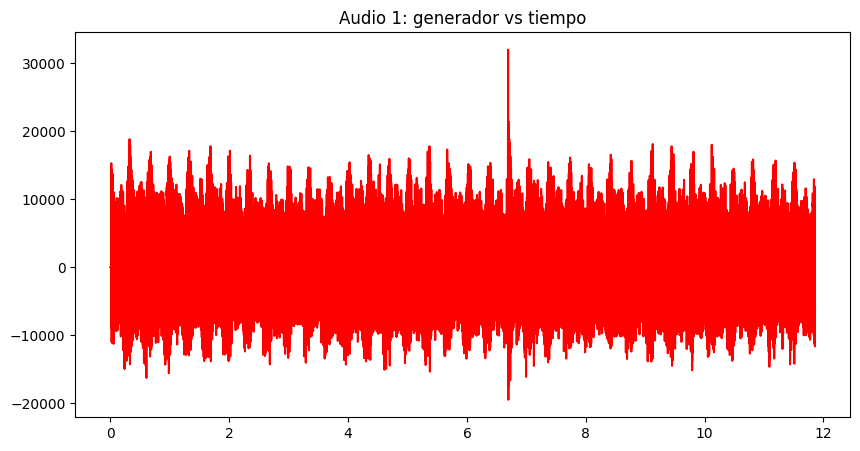


La frecuencia de muestreo del sonido "2rueda" es 44100 Hz
La cantidad de muestras del audio "2rueda" es de 461908
El tiempo total del audio "2rueda" es de 10.474104308390023 segundos



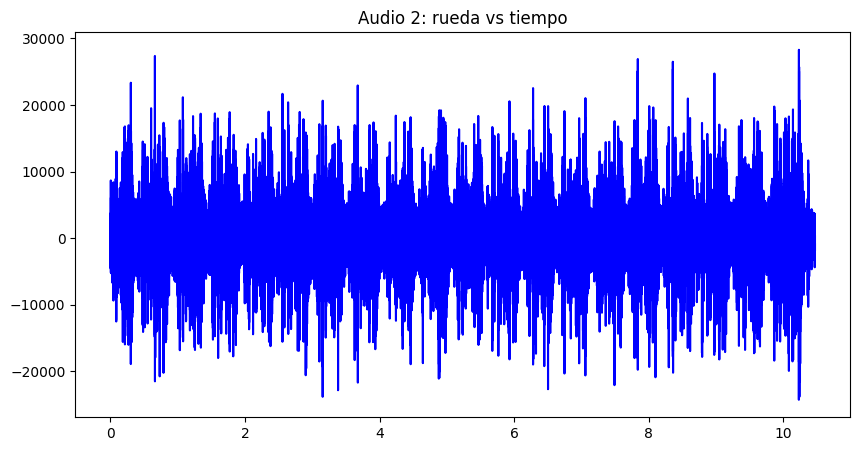


La frecuencia de muestreo del sonido "3cuerda" es 44100 Hz
La cantidad de muestras del audio "3cuerda" es de 812654
El tiempo total del audio "3cuerda" es de 18.427528344671202 segundos



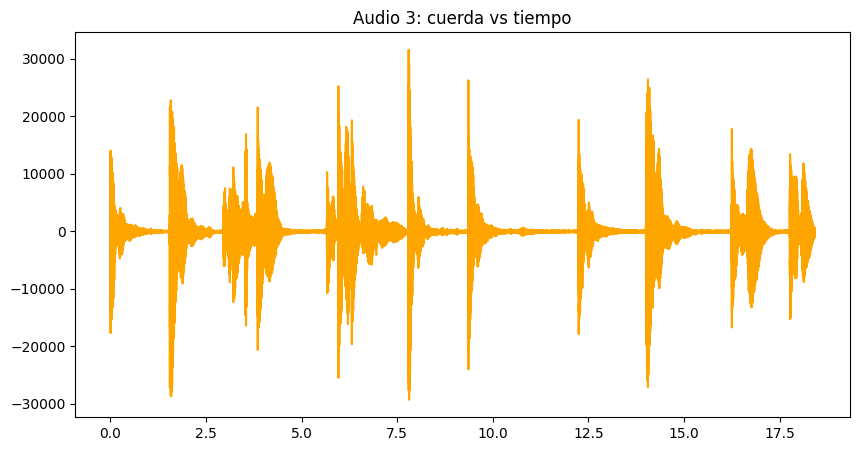


La frecuencia de muestreo del sonido "4monitor" es 44100 Hz
La cantidad de muestras del audio "4monitor" es de 3279580
El tiempo total del audio "4monitor" es de 74.36689342403628 segundos



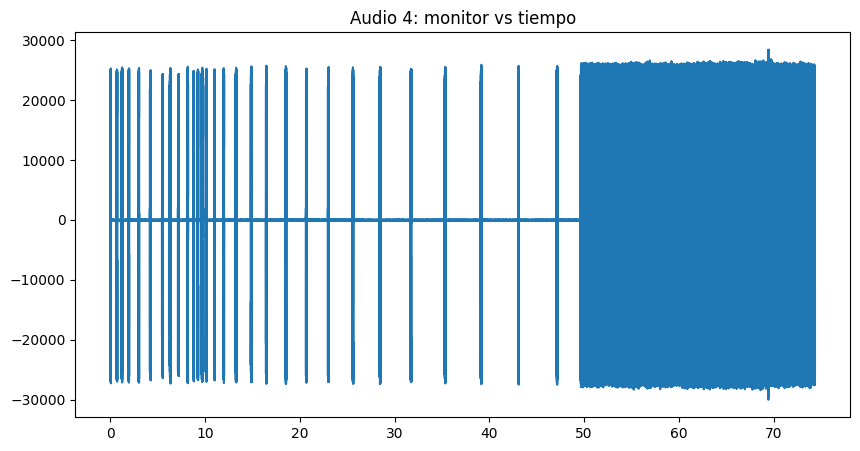

In [ ]:
### AUDIO 1 ###
generador=read('1generador.wav')  #Cargo el archivo de audio "1generador.wav" en la variable generador

fgenerador=generador[0]     #Almaceno en la variable fgenerador el primer elemento de la variable generador =  frecuencia de muestreo
print('La frecuencia de muestreo del sonido "1generador" es '+ str(fgenerador) +' Hz') #Imprimo la frecuencia de muestreo

mat_generador=generador[1]  #Almaceno el segundo elemento de la variable generador, es decir, guardo la matriz del audio
sgenerador=mat_generador[:,0] #En la variable sgenerador guardo uno de los canales del audio, el de la columna 0

Mgenerador = len(sgenerador) #Calculo la cantidad de muestras del sonido "generador"
print('La cantidad de muestras del audio "1generador" es de '+ str(Mgenerador))
Tgenerador = Mgenerador/fgenerador  #Calculo el tiempo total del sonido "generador" medido en segundos. 
#Lo hago usando regla de 3 simple: fgenerador (cant de muestras en 1 segundo) ---- 1 segundo
                                  #Mgenerador (cant de muestras total) ------- Tgenerador (tiempo total) = Mgenerador*1s/fgenerador
print('El tiempo total del audio "1generador" es de '+ str(Tgenerador) + ' segundos' + '\n')

tdgenerador=np.arange(0,Mgenerador)/fgenerador #Genero el vector de tiempos discretizado del audio generador

plt.figure(figsize=(10,5))  #le doy un tamaño a la figura
plt.plot(tdgenerador,sgenerador, color='red') #grafico la señal del audio vs el tiempo y le otorgo un color de línea
plt.title('Audio 1: generador vs tiempo') #agrego un título al gráfico
plt.show() #muestro la figura y permito que se creen otras figuras separadas

##El mismo código se repite para el resto de los audios de forma similar##

### AUDIO 2 ###
rueda=read('2rueda.wav')  

frueda = rueda[0]     
print('\n' + 'La frecuencia de muestreo del sonido "2rueda" es '+ str(frueda) +' Hz') 

mat_rueda=rueda[1]  
srueda=mat_rueda[:,0]

Mrueda = len(srueda)
print('La cantidad de muestras del audio "2rueda" es de '+ str(Mrueda))
Trueda = Mrueda/frueda
print('El tiempo total del audio "2rueda" es de '+ str(Trueda) + ' segundos' + '\n')

tdrueda=np.arange(0,Mrueda)/frueda

plt.figure(figsize=(10,5))
plt.plot(tdrueda,srueda, color='blue')
plt.title('Audio 2: rueda vs tiempo')
plt.show()


### AUDIO 3 ###
cuerda=read('3cuerda.wav')  

fcuerda = cuerda[0]     
print('\n' + 'La frecuencia de muestreo del sonido "3cuerda" es '+ str(fcuerda) +' Hz') 

mat_cuerda=cuerda[1]  
scuerda=mat_cuerda[:,0] 

Mcuerda = len(scuerda)
print('La cantidad de muestras del audio "3cuerda" es de '+ str(Mcuerda))
Tcuerda = Mcuerda/fcuerda
print('El tiempo total del audio "3cuerda" es de '+ str(Tcuerda) + ' segundos' + '\n')

tdcuerda=np.arange(0,Mcuerda)/fcuerda 

plt.figure(figsize=(10,5))
plt.plot(tdcuerda,scuerda, color='orange')
plt.title('Audio 3: cuerda vs tiempo')
plt.show()

### AUDIO 4 ###
monitor=read('4monitor.wav')  

fmonitor = monitor[0]    
print('\n' + 'La frecuencia de muestreo del sonido "4monitor" es '+ str(fmonitor) +' Hz') 

mat_monitor=monitor[1]  
smonitor=mat_monitor[:,0] 

Mmonitor = len(smonitor)
print('La cantidad de muestras del audio "4monitor" es de '+ str(Mmonitor))
Tmonitor = Mmonitor/fmonitor
print('El tiempo total del audio "4monitor" es de '+ str(Tmonitor) + ' segundos'+ '\n')

tdmonitor=np.arange(0,Mmonitor)/fmonitor 

plt.figure(figsize=(10,5))
plt.plot(tdmonitor,smonitor)
plt.title('Audio 4: monitor vs tiempo')
plt.show()

2) Graficar el espectrograma de la señal de audio (en función del tiempo y frecuencia en Hertz) utilizando una ventana Hamming de longitud 10001, DFT punto N=Fr cantidad de muestras en 1s y un solapado del 10%. Analice los resultados. Puede decir que la señal es estacionaria? Justifique.

In [ ]:
hventana=signal.hamming(10001) #ventana Hamming de longitud 10001 muestras

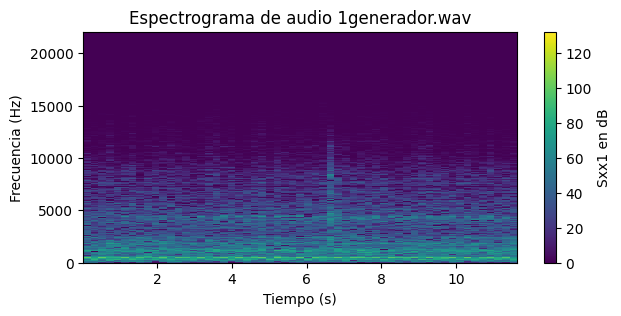

In [ ]:
### AUDIO 1 ###
N=Mgenerador
f1, t1, Sxx1 = signal.spectrogram(sgenerador,fs=fgenerador, window=hventana,nfft=N, noverlap=1000) #espectograma con solape del 10% de la ventana Hamming
dbSxx1=20*np.log10(1+abs(Sxx1)) #convierto a decibeles los coeficientes del espectrograma para poder visualizarlos mejor
plt.figure(figsize=(7, 3)) #le doy tamaño a la figura
plt.pcolormesh(t1, f1, dbSxx1) #grafico el espectrograma en función del tiempo (eje de las x), de la frecuencia (eje de las y) y 
#los coeficientes del espectrograma se muestran en colores
plt.xlabel('Tiempo (s)') #coloco leyenda del eje de las x
plt.ylabel('Frecuencia (Hz)') #coloco leyenda del eje de las y
plt.title('Espectrograma de audio 1generador.wav') #coloco título al gráfico
plt.colorbar(label='Sxx1 en dB') #muestro la escala de colores, y le coloco la leyenda para indicar que está en decibeles
plt.show() #muestro el gráfico

Como se observó en la tarea 2, esta señal es predominantemente estacionaria. Esto quiere decir que aunque se observan cambios a lo largo del tiempo los componentes en frecuencia son aproximadamente constantes a lo largo del tiempo. En el espectrograma se pueden observar con más detalle estos cambios respecto al uso de la STFT en determinados segundos porque se ve la discontinuidad de colores en toda la extensión de la señal en el tiempo.

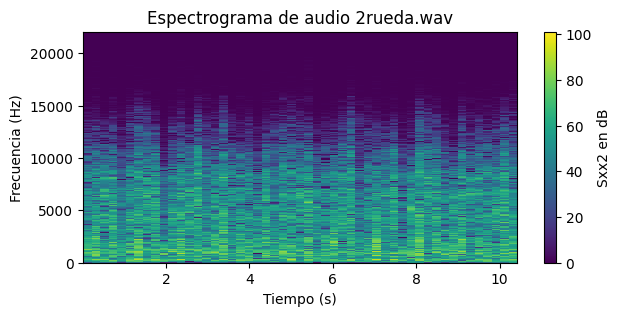

In [ ]:
#El código es similar para el resto de los audios#
### AUDIO 2 ###
N=Mrueda
f2, t2, Sxx2 = signal.spectrogram(srueda,fs=frueda, window=hventana,nfft=N, noverlap=1000) 
dbSxx2=20*np.log10(1+abs(Sxx2)) #se convierte a decibeles para una mejor visualización
plt.figure(figsize=(7, 3))
plt.pcolormesh(t2, f2, dbSxx2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de audio 2rueda.wav')
plt.colorbar(label='Sxx2 en dB')
plt.show()

Como se observó en la tarea 2 y en el caso anterior, esta señal es predominantemente estacionaria. Esto quiere decir que aunque se observan cambios a lo largo del tiempo, los componentes en frecuencia son aproximadamente constantes a lo largo del tiempo. En el espectrograma se pueden observar con más detalle estos cambios respecto al uso de la STFT en determinados segundos porque se ve la discontinuidad de colores en toda la extensión de la señal en el tiempo.

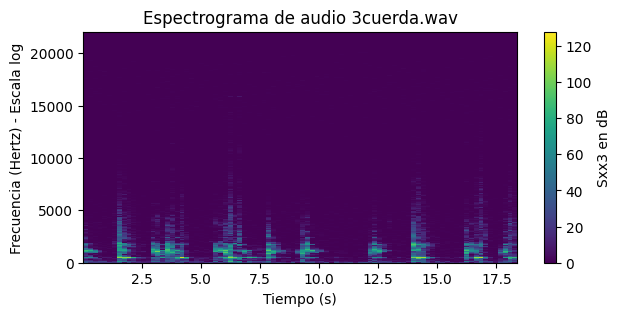

In [ ]:
### AUDIO 3 ###
N=Mcuerda
f3, t3, Sxx3 = signal.spectrogram(scuerda,fs=fcuerda, window=hventana,nfft=N, noverlap=1000) 
dbSxx3=20*np.log10(1+abs(Sxx3)) #se convierte a decibeles para una mejor visualización
plt.figure(figsize=(7, 3))
plt.pcolormesh(t3, f3, dbSxx3)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hertz) - Escala log')
plt.title('Espectrograma de audio 3cuerda.wav')
plt.colorbar(label='Sxx3 en dB')
plt.show()

Como se observó en la Tarea 2, esta señal es NO estacionaria, debido a que se observan los cambios de componentes en frecuencia a lo largo del tiempo.

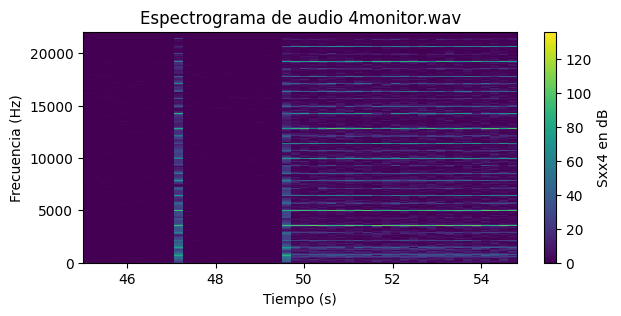

In [ ]:
### AUDIO 4 ###
N=Mmonitor

f4, t4, Sxx4 = signal.spectrogram(smonitor[45*fmonitor:55*fmonitor],fs=fmonitor, window=hventana,nfft=N, noverlap=1000) 
#acá analizo solo una parte de la señal porque el audio es demasiado largo y Colab no puede analizar audios tan largos con la ventana Hamming de 10001

t4=t4+45 #acá le sumo al vector t4 45 segundos que es el inicio del intervalo analizado

dbSxx4=20*np.log10(1+abs(Sxx4)) #se convierte a decibeles para una mejor visualización
plt.figure(figsize=(7, 3))
plt.pcolormesh(t4, f4, dbSxx4)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de audio 4monitor.wav')
plt.colorbar(label='Sxx4 en dB')
plt.show()

Como se observó en la Tarea 2, esta señal es NO estacionaria, debido a que se observan los cambios de componentes en frecuencia a lo largo del tiempo.

3) Realice un análisis análogo al item anterior pero con mejor resolución en frecuencia. Justifique y comente diferencias encontradas.

In [ ]:
hventana9=signal.hamming(90001) #ventana Hamming de longitud 90001 muestras, es decir una ventana más ancha en el tiempo, lo que da una PEOR resolución temporal
                              #y una MEJOR resolución en FRECUENCIA

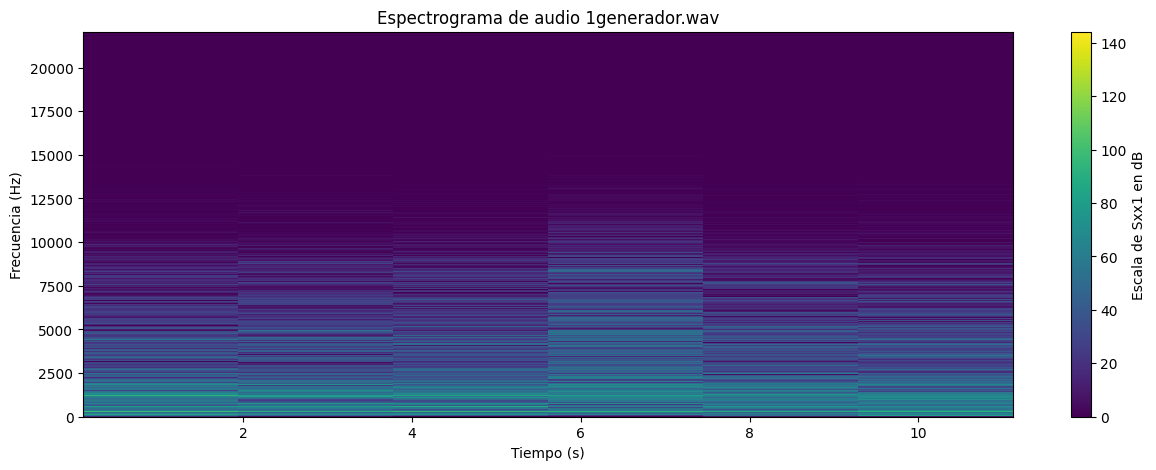

In [ ]:
#El código utilizado es muy similar al código del punto anterior, solo cambia la longitud de la ventana 
#y el solape para hacerlo coincidir con el 10% de esta nueva ventana
### AUDIO 1 ###
N=Mgenerador
f1, t1, Sxx1 = signal.spectrogram(sgenerador,fs=fgenerador, window=hventana9,nfft=N, noverlap=9000) 
dbSxx1=20*np.log10(1+abs(Sxx1)) #se convierte a decibeles para una mejor visualización
plt.figure(figsize=(15, 5))
plt.pcolormesh(t1, f1, dbSxx1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de audio 1generador.wav')
plt.colorbar(label='Escala de Sxx1 en dB')
plt.show()

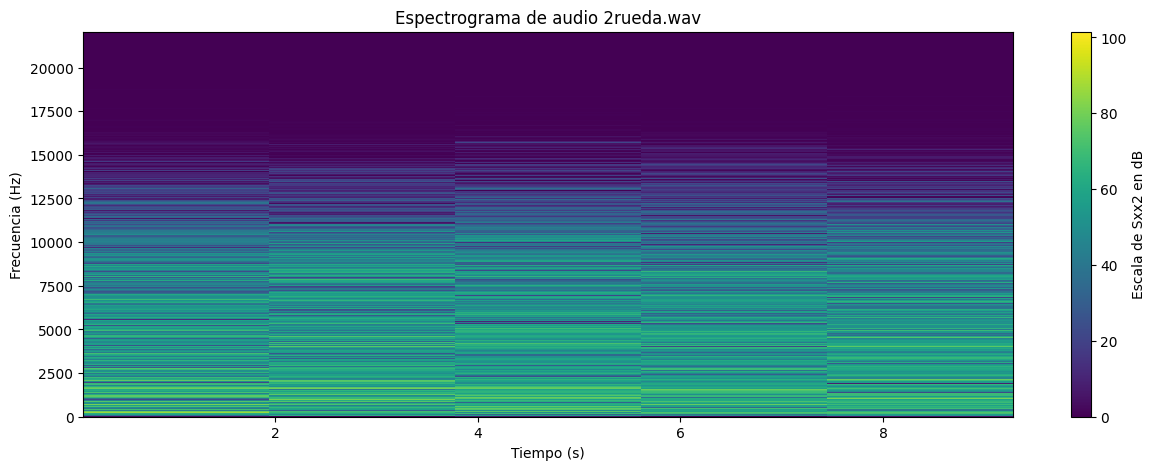

In [ ]:
### AUDIO 2 ###
N=Mrueda
f2, t2, Sxx2 = signal.spectrogram(srueda,fs=frueda, window=hventana9,nfft=N, noverlap=9000) 
dbSxx2=20*np.log10(1+abs(Sxx2)) #se convierte a decibeles para una mejor visualización
plt.figure(figsize=(15, 5))
plt.pcolormesh(t2, f2, dbSxx2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de audio 2rueda.wav')
plt.colorbar(label='Escala de Sxx2 en dB')
plt.show()

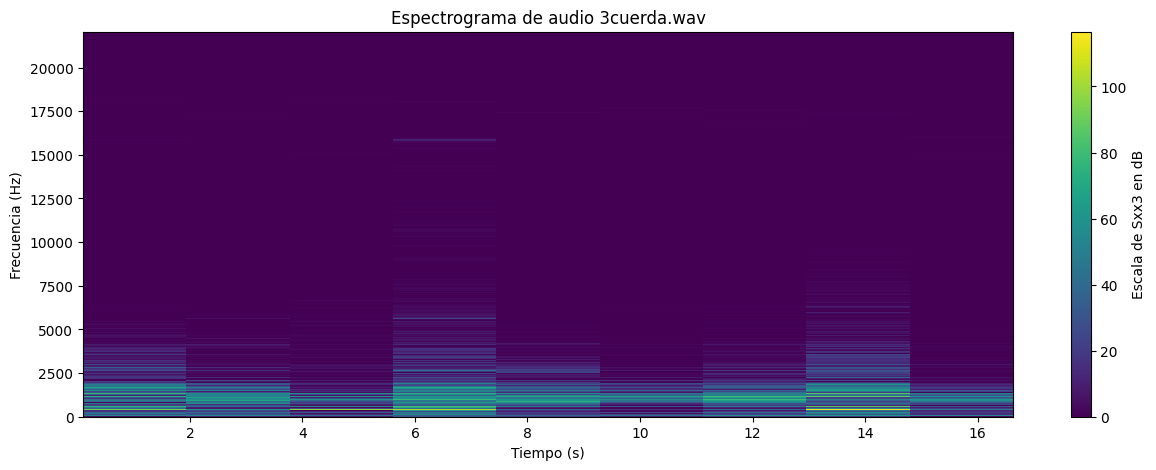

In [ ]:
### AUDIO 3 ###
N=Mcuerda
f3, t3, Sxx3 = signal.spectrogram(scuerda,fs=fcuerda, window=hventana9,nfft=N, noverlap=9000) 
dbSxx3=20*np.log10(1+abs(Sxx3)) #se convierte a decibeles para una mejor visualización
plt.figure(figsize=(15, 5))
plt.pcolormesh(t3, f3, dbSxx3)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de audio 3cuerda.wav')
plt.colorbar(label='Escala de Sxx3 en dB')
plt.show()

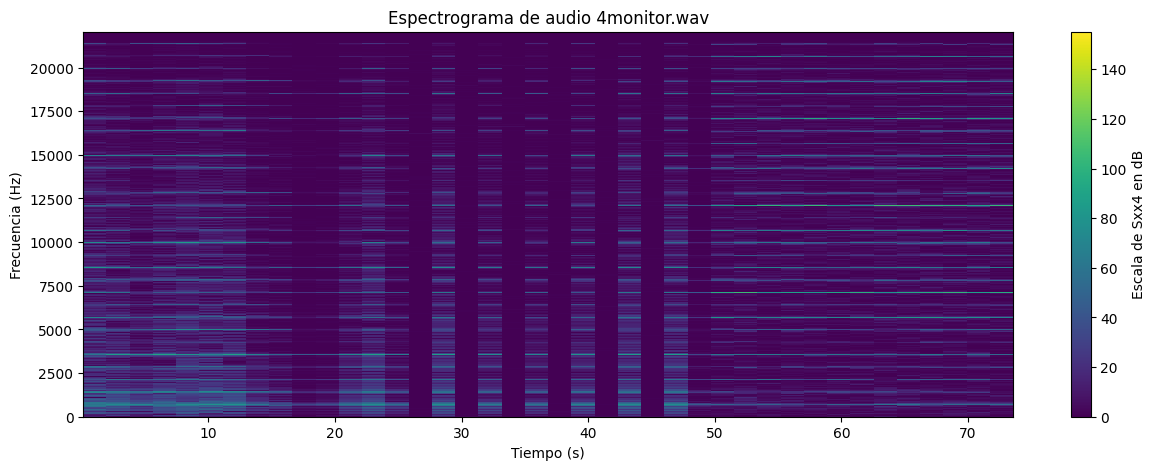

In [ ]:
### AUDIO 4 ###
N=Mmonitor
f4, t4, Sxx4 = signal.spectrogram(smonitor,fs=fmonitor, window=hventana9,nfft=N, noverlap=9000) 
#en este caso si trabajo con toda la señal porque la ventana es mucho más ancha y GoogleColab lo permite
dbSxx4=20*np.log10(1+abs(Sxx4)) #se convierte a decibeles para una mejor visualización
plt.figure(figsize=(15, 5))
plt.pcolormesh(t4, f4, dbSxx4)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma de audio 4monitor.wav')
plt.colorbar(label='Escala de Sxx4 en dB')
plt.show()

En todos los casos se observa que las líneas miradas desde el eje de las frecuencias disminuyen su ancho, es decir, mejora la resolución en frecuencia. Sin embargo, en todos los casos el acho de las líneas miradas desde el eje de los tiempos aumenta, por lo tanto, se concluye que empeora la resolución en el tiempo. Es decir, que ensachando la ventana podemos observar con más detalle los cambios en frecuencia pero se van perdiendo los detalles en el tiempo. Por lo tanto, es más difícil analizar si una señal es estacionaria o no, con una ventana de tiempo demasiado ancha.

4) Que longitud tienen las ventanas utilizadas en los items 2 y 3? pasadas a segundos?

In [ ]:
#hventana que es la ventana de 10001 muestras tiene el siguiente ancho en segundos, de acuerdo al audio:
#AUDIO 1#
Mventana=10001
ancho_ventana1=Mventana/fgenerador
print('El ancho de la ventana Hamming de ' + str(Mventana) + ' muestras para el audio "1generador.wav" es de ' + str(ancho_ventana1) + ' segundos')
#AUDIO 2#
ancho_ventana2=Mventana/frueda
print('El ancho de la ventana Hamming de ' + str(Mventana) + ' muestras para el audio "2rueda.wav" es de ' + str(ancho_ventana2) + ' segundos')
#AUDIO 3#
ancho_ventana3=Mventana/fcuerda
print('El ancho de la ventana Hamming de ' + str(Mventana) + ' muestras para el audio "3cuerda.wav" es de ' + str(ancho_ventana3) + ' segundos')
#AUDIO 4#
ancho_ventana4=Mventana/fmonitor
print('El ancho de la ventana Hamming de ' + str(Mventana) + ' muestras para el audio "4monitor.wav" es de ' + str(ancho_ventana4) + ' segundos')

El ancho de la ventana Hamming de 10001 muestras para el audio "1generador.wav" es de 0.22678004535147392 segundos
El ancho de la ventana Hamming de 10001 muestras para el audio "2rueda.wav" es de 0.22678004535147392 segundos
El ancho de la ventana Hamming de 10001 muestras para el audio "3cuerda.wav" es de 0.22678004535147392 segundos
El ancho de la ventana Hamming de 10001 muestras para el audio "4monitor.wav" es de 0.22678004535147392 segundos


In [ ]:
#hventana9 que es la ventana de 90001 muestras tiene el siguiente ancho en segundos, de acuerdo al audio:
#AUDIO 1#
Mventana9=90001
ancho_ventana1=Mventana9/fgenerador
print('El ancho de la ventana Hamming de ' + str(Mventana9) + ' muestras para el audio "1generador.wav" es de ' + str(ancho_ventana1) + ' segundos')
#AUDIO 2#
ancho_ventana2=Mventana9/frueda
print('El ancho de la ventana Hamming de ' + str(Mventana9) + ' muestras para el audio "2rueda.wav" es de ' + str(ancho_ventana2) + ' segundos')
#AUDIO 3#
ancho_ventana3=Mventana9/fcuerda
print('El ancho de la ventana Hamming de ' + str(Mventana9) + ' muestras para el audio "3cuerda.wav" es de ' + str(ancho_ventana3) + ' segundos')
#AUDIO 4#
ancho_ventana4=Mventana9/fmonitor
print('El ancho de la ventana Hamming de ' + str(Mventana9) + ' muestras para el audio "4monitor.wav" es de ' + str(ancho_ventana4) + ' segundos')

El ancho de la ventana Hamming de 90001 muestras para el audio "1generador.wav" es de 2.0408390022675738 segundos
El ancho de la ventana Hamming de 90001 muestras para el audio "2rueda.wav" es de 2.0408390022675738 segundos
El ancho de la ventana Hamming de 90001 muestras para el audio "3cuerda.wav" es de 2.0408390022675738 segundos
El ancho de la ventana Hamming de 90001 muestras para el audio "4monitor.wav" es de 2.0408390022675738 segundos


En este caso, todos los audios tienen la misma frecuencia de muestreo, y es por eso que el ancho de las ventanas, medido en segundos, es igual para todos los audios (no suele ser la situación más común).